In [21]:
# MSRP Price Category Classification
# This notebook reads a car dataset and creates a new column categorizing MSRP into Low, Medium, and High price categories

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Set the style for better visualizations
plt.style.use('ggplot')
sns.set_palette("deep")

## Task1

The dataset contains a column MSRP **(Manufacturer's Suggested Retail Price)**, which represents the price of the car. Create a new column Price Category that categorizes the MSRP values into three categories:

* Low: MSRP less than 20,000
* Medium: MSRP between 20,000 and 40,000
* High: MSRP greater than 40,000

In [22]:
# Read the CSV file
df = pd.read_csv('dataset_da_assignm3.csv')

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
df.head()

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for missing values in the MSRP column
print("\nMissing Values in MSRP column:", df['MSRP'].isna().sum())

Dataset Preview:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-nu

In [23]:
# Display the first few rows to understand the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [24]:
# Check basic information about the dataset
print("\nDataset info:")
display(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: floa

None

In [25]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())


Descriptive statistics for numerical columns:


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [26]:
# Get summary statistics of the MSRP column
print("\nMSRP Summary Statistics:")
df['MSRP'].describe()

# Create a new column 'Price Category' that categorizes MSRP into Low, Medium, and High
def categorize_price(msrp):
    if msrp < 20000:
        return 'Low'
    elif 20000 <= msrp <= 40000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
df['Price Category'] = df['MSRP'].apply(categorize_price)

# Display the first few rows with the new column
print("\nDataset with Price Category column:")
df.head()

# Check the distribution of Price Categories
price_category_counts = df['Price Category'].value_counts()
print("\nPrice Category Distribution:")
print(price_category_counts)


MSRP Summary Statistics:

Dataset with Price Category column:

Price Category Distribution:
Price Category
Medium    5838
High      3367
Low       2709
Name: count, dtype: int64


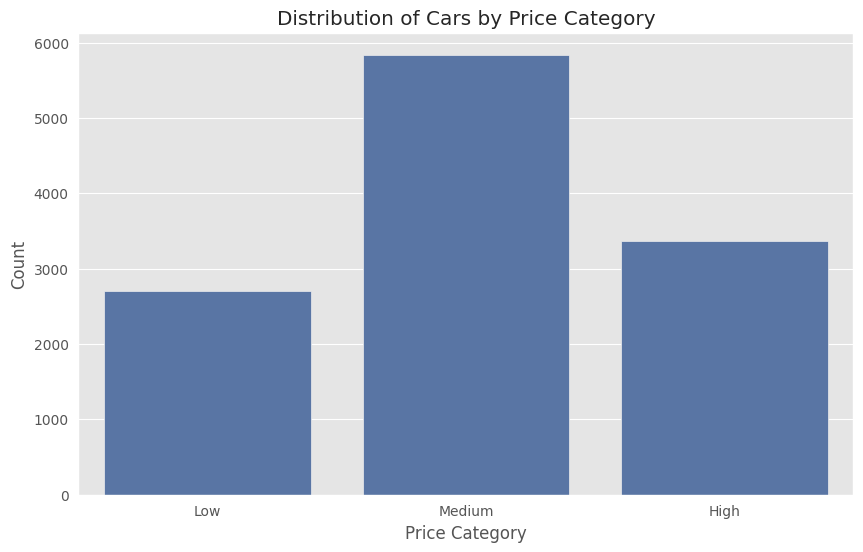

In [28]:
# Visualize the distribution of Price Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Category', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Cars by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

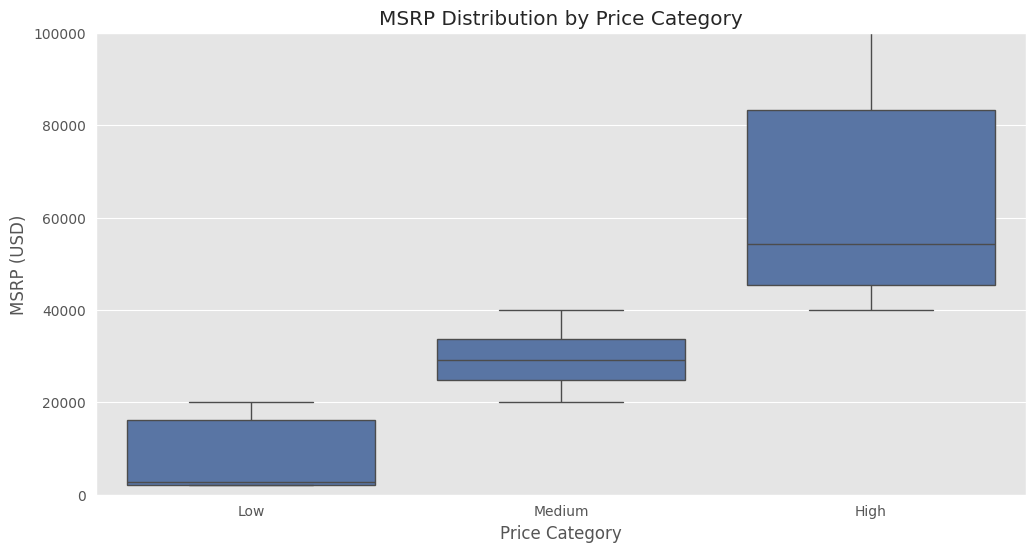

In [27]:
# Visualize MSRP distribution by Price Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price Category', y='MSRP', data=df, order=['Low', 'Medium', 'High'])
plt.title('MSRP Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('MSRP (USD)')
plt.ylim(0, 100000)  # Setting a limit to better visualize the distribution
plt.show()

## Task 2

2.The dataset contains several columns, including Make, Engine HP, and MSRP. Perform a group-by aggregation on the Make column. For each make, calculate the following:
* The average Engine HP
* The total MSRP across all cars for that make

In [29]:
# Check data types to ensure numeric calculations will work
print("\nData types:")
print(df[['Make', 'Engine HP', 'MSRP']].dtypes)

# Clean the data by removing rows with missing Engine HP or MSRP values
df_clean = df.dropna(subset=['Engine HP', 'MSRP'])
print(f"\nRemoved {df.shape[0] - df_clean.shape[0]} rows with missing values")


Data types:
Make          object
Engine HP    float64
MSRP           int64
dtype: object

Removed 69 rows with missing values


In [30]:
# Perform the group-by aggregation on the Make column
# Calculate average Engine HP and total MSRP for each make
make_aggregation = df_clean.groupby('Make').agg({
    'Engine HP': 'mean',
    'MSRP': 'sum'
})

# Rename columns for clarity
make_aggregation.columns = ['Average Engine HP', 'Total MSRP']

# Add a count of cars per make for reference
make_aggregation['Car Count'] = df_clean.groupby('Make').size()

# Sort results alphabetically by Make
make_aggregation = make_aggregation.sort_index()

# Display the first 10 rows of the aggregated data
print("\nFirst 10 rows of aggregated data:")
make_aggregation.head(10)


First 10 rows of aggregated data:


,Average Engine HP,Total MSRP,Car Count
Make,,,
Acura,244.797619,8791672,252
Alfa Romeo,237.000000,308000,5
Aston Martin,484.322581,18405665,93
Audi,277.695122,17532293,328
BMW,326.907186,20556619,334
Bentley,533.851351,18290530,74
Bugatti,1001.000000,5271671,3
Buick,219.244898,5528496,196
Cadillac,332.309824,22323833,397


In [31]:
# Find makes with the highest average Engine HP and highest total MSRP
highest_avg_hp = make_aggregation['Average Engine HP'].idxmax()
highest_total_msrp = make_aggregation['Total MSRP'].idxmax()

print(f"\nMake with highest average Engine HP: {highest_avg_hp} with {make_aggregation.loc[highest_avg_hp, 'Average Engine HP']:.2f} HP")
print(f"Make with highest total MSRP: {highest_total_msrp} with ${make_aggregation.loc[highest_total_msrp, 'Total MSRP']:,.2f}")


Make with highest average Engine HP: Bugatti with 1001.00 HP
Make with highest total MSRP: Chevrolet with $31,602,318.00


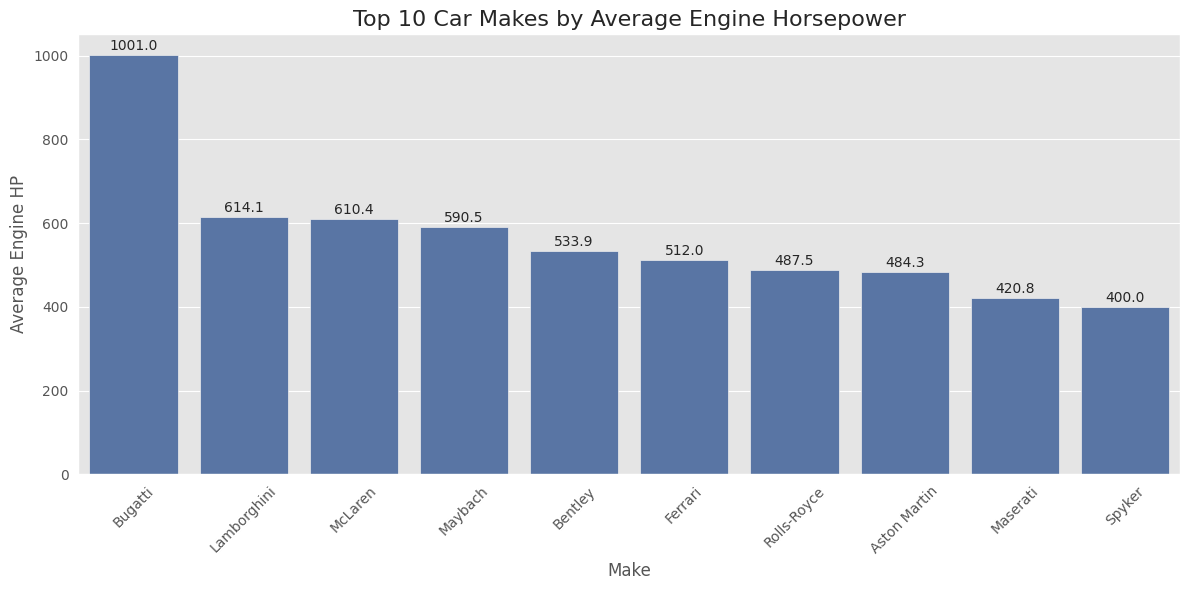

In [32]:
# Visualize the results

# 1. Top 10 makes by average Engine HP
top_hp = make_aggregation.sort_values('Average Engine HP', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_hp.index, y='Average Engine HP', data=top_hp)
plt.title('Top 10 Car Makes by Average Engine Horsepower', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Engine HP', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width()/2., 
              bar.get_height() + 5,
              f'{bar.get_height():.1f}',
              ha='center', va='bottom')
    
plt.show()

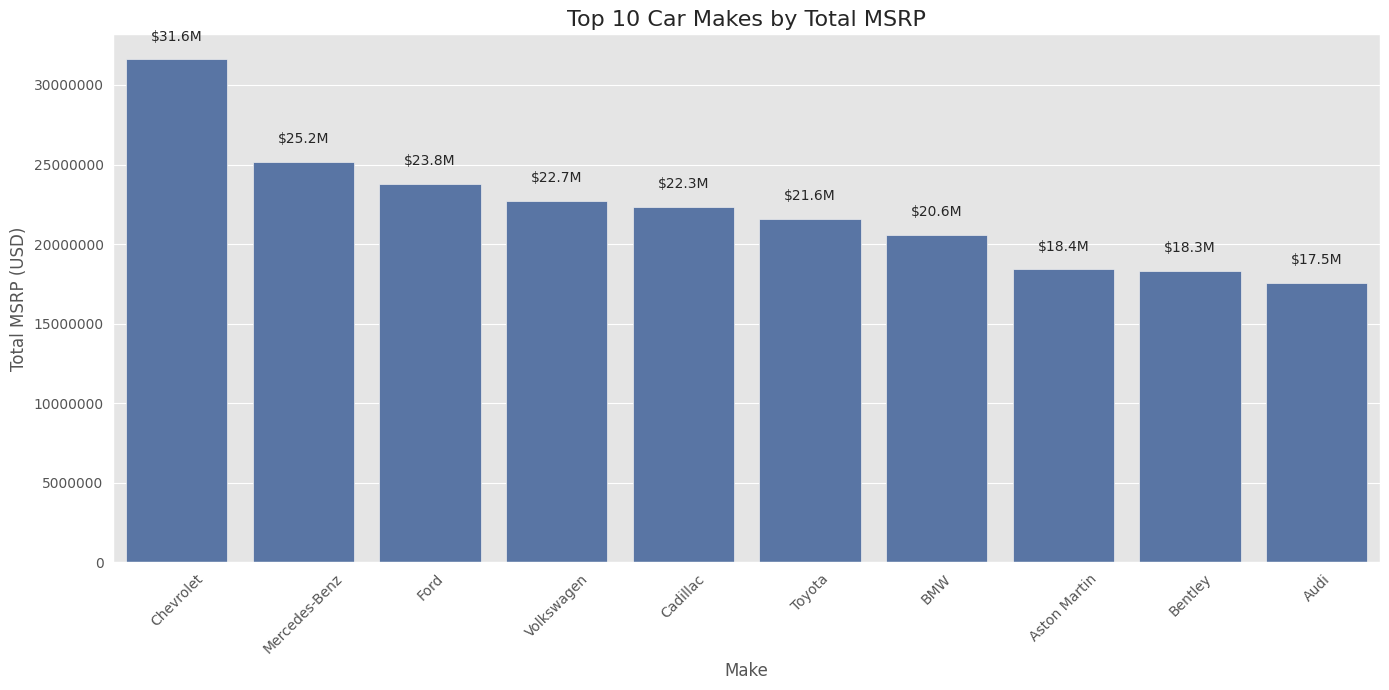

In [33]:
# 2. Top 10 makes by total MSRP
top_msrp = make_aggregation.sort_values('Total MSRP', ascending=False).head(10)
plt.figure(figsize=(14, 7))
bars = sns.barplot(x=top_msrp.index, y='Total MSRP', data=top_msrp)
plt.title('Top 10 Car Makes by Total MSRP', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Total MSRP (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

# Add value labels on top of each bar (formatted as millions)
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width()/2., 
              bar.get_height() + 1000000,
              f'${bar.get_height()/1000000:.1f}M',
              ha='center', va='bottom')
    
plt.show()

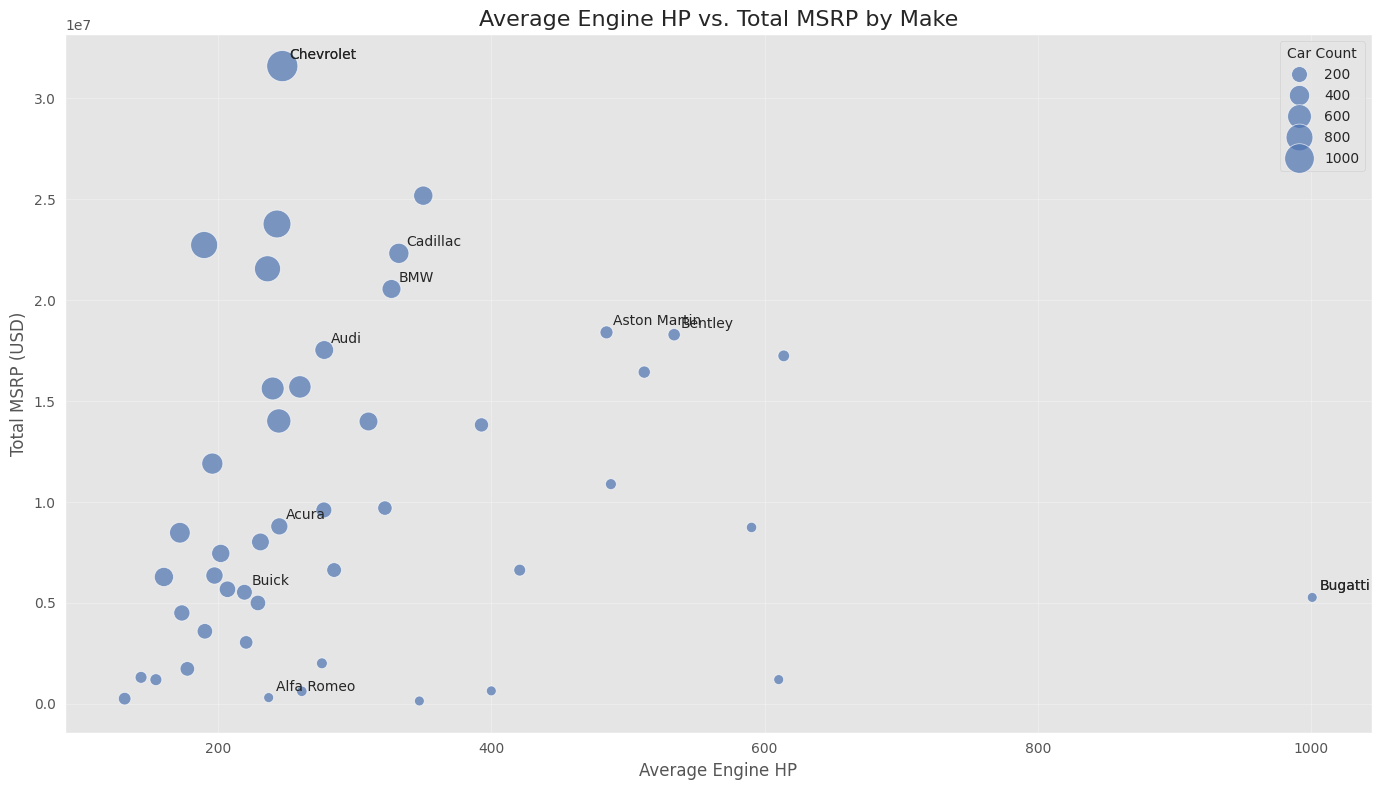

In [34]:
# 3. Scatter plot of Average Engine HP vs. Total MSRP (excluding outliers for better visualization)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=make_aggregation, x='Average Engine HP', y='Total MSRP', 
                size='Car Count', sizes=(50, 500), alpha=0.7)

# Annotate interesting points (top makes)
for make in make_aggregation.index[:10]:  # Annotate first 10 alphabetically
    x = make_aggregation.loc[make, 'Average Engine HP']
    y = make_aggregation.loc[make, 'Total MSRP']
    plt.annotate(make, (x, y), xytext=(5, 5), textcoords='offset points')

# Also annotate the notable outliers/top performers
for make in [highest_avg_hp, highest_total_msrp]:
    x = make_aggregation.loc[make, 'Average Engine HP']
    y = make_aggregation.loc[make, 'Total MSRP']
    plt.annotate(make, (x, y), xytext=(5, 5), textcoords='offset points')

plt.title('Average Engine HP vs. Total MSRP by Make', fontsize=16)
plt.xlabel('Average Engine HP', fontsize=12)
plt.ylabel('Total MSRP (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 3

3. The dataset contains numerical columns Engine HP and MSRP. Perform the following statistical
analysis:
* Calculate the correlation between Engine HP and MSRP to determine how strongly these two variables are related.
* Calculate the standard deviation of the MSRP column to understand the variation in car prices.
* Explain statistically what the results mean.

In [35]:
# 1. Calculate the correlation between Engine HP and MSRP
correlation = df['Engine HP'].corr(df['MSRP'])
print(f"\nCorrelation between Engine HP and MSRP: {correlation:.4f}")


Correlation between Engine HP and MSRP: 0.6620


In [36]:
# 2. Calculate the standard deviation of MSRP
msrp_std = df['MSRP'].std()
print(f"\nStandard deviation of MSRP: ${msrp_std:.2f}")


Standard deviation of MSRP: $60109.10


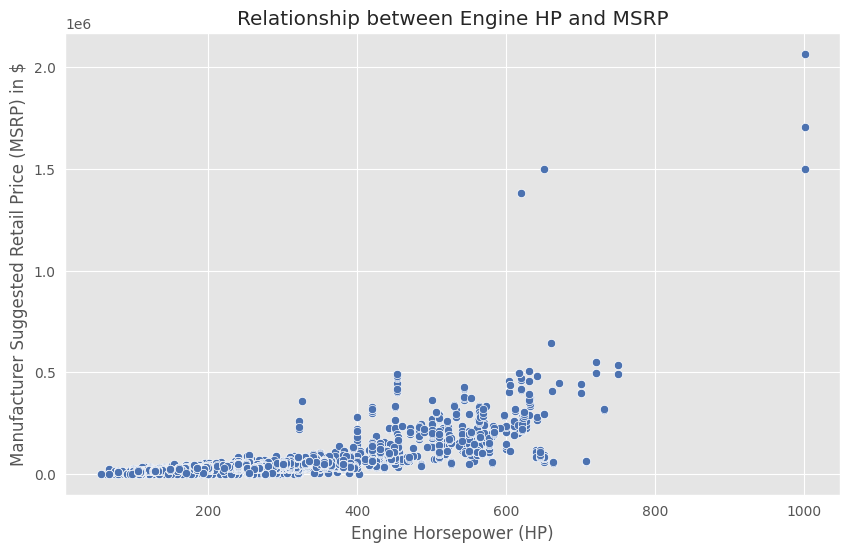

In [37]:
# 3. Visualize the relationship between Engine HP and MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine HP', y='MSRP')
plt.title('Relationship between Engine HP and MSRP')
plt.xlabel('Engine Horsepower (HP)')
plt.ylabel('Manufacturer Suggested Retail Price (MSRP) in $')
plt.grid(True)
plt.show()

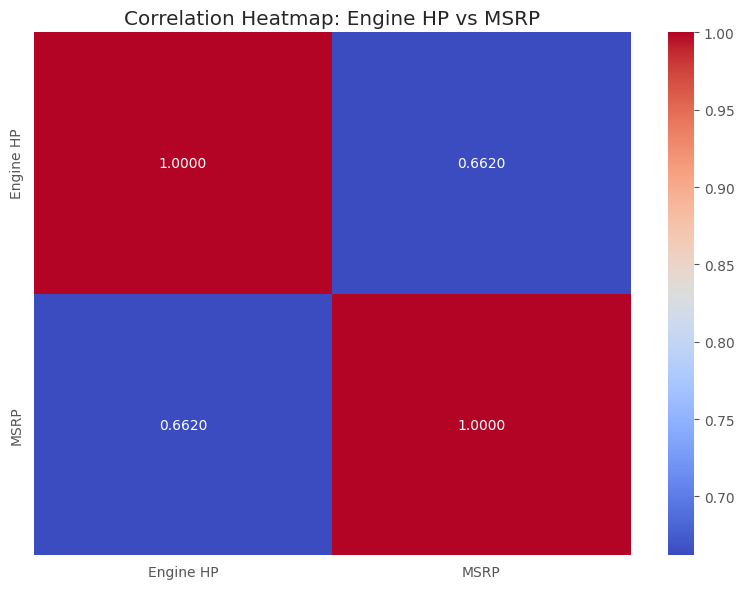

In [38]:
# Display correlation heatmap for better visualization
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Engine HP', 'MSRP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap: Engine HP vs MSRP')
plt.tight_layout()
plt.show()

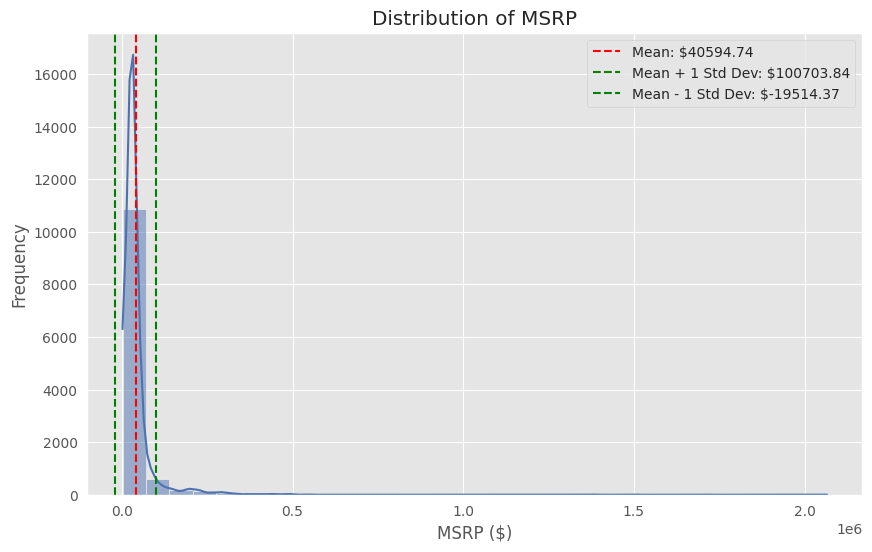

In [39]:
# Create a histogram to visualize the distribution of MSRP
plt.figure(figsize=(10, 6))
sns.histplot(df['MSRP'], kde=True, bins=30)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP ($)')
plt.ylabel('Frequency')
plt.axvline(df['MSRP'].mean(), color='red', linestyle='--', label=f'Mean: ${df["MSRP"].mean():.2f}')
plt.axvline(df['MSRP'].mean() + df['MSRP'].std(), color='green', linestyle='--', 
           label=f'Mean + 1 Std Dev: ${df["MSRP"].mean() + df["MSRP"].std():.2f}')
plt.axvline(df['MSRP'].mean() - df['MSRP'].std(), color='green', linestyle='--', 
           label=f'Mean - 1 Std Dev: ${df["MSRP"].mean() - df["MSRP"].std():.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Statistical Interpretation
print("\nStatistical Interpretation:")
print("-" * 50)
print("1. Correlation Analysis:")
if correlation > 0.7:
    print(f"   - Strong positive correlation ({correlation:.4f}) between Engine HP and MSRP.")
    print("   - This indicates that cars with higher horsepower tend to have significantly higher prices.")
elif correlation > 0.4:
    print(f"   - Moderate positive correlation ({correlation:.4f}) between Engine HP and MSRP.")
    print("   - This suggests that higher horsepower is associated with higher prices, but other factors also play important roles.")
elif correlation > 0.1:
    print(f"   - Weak positive correlation ({correlation:.4f}) between Engine HP and MSRP.")
    print("   - While there is some relationship, horsepower is not a strong predictor of price.")
elif correlation > -0.1:
    print(f"   - Negligible correlation ({correlation:.4f}) between Engine HP and MSRP.")
    print("   - There appears to be little to no linear relationship between horsepower and price.")
else:
    print(f"   - Negative correlation ({correlation:.4f}) between Engine HP and MSRP.")
    print("   - This unexpected result suggests that higher horsepower is associated with lower prices.")

print("\n2. Standard Deviation Analysis:")
cv_msrp = msrp_std / df['MSRP'].mean() * 100
print(f"   - Standard deviation of MSRP: ${msrp_std:.2f}")
print(f"   - Coefficient of variation: {cv_msrp:.2f}%")

if cv_msrp > 50:
    print("   - The high standard deviation indicates significant price variation in the dataset.")
    print("   - This suggests a diverse range of vehicles from economy to luxury models.")
elif cv_msrp > 30:
    print("   - The moderate standard deviation indicates notable price variation in the dataset.")
    print("   - This suggests a reasonably diverse range of vehicle price points.")
else:
    print("   - The relatively low standard deviation indicates limited price variation in the dataset.")
    print("   - This suggests the dataset may focus on a specific segment of the automotive market.")

print("\n3. Overall Insights:")
print("   - The standard deviation contextualizes the spread of prices around the mean.")
print("   - Approximately 68% of car prices fall within one standard deviation of the mean.")
print(f"   - This means about 68% of cars are priced between ${df['MSRP'].mean() - msrp_std:.2f} and ${df['MSRP'].mean() + msrp_std:.2f}.")
print("   - The correlation coefficient quantifies the strength and direction of the relationship between horsepower and price.")
print("   - This analysis helps understand how engine performance relates to vehicle pricing in the market.")


Statistical Interpretation:
--------------------------------------------------
1. Correlation Analysis:
   - Moderate positive correlation (0.6620) between Engine HP and MSRP.
   - This suggests that higher horsepower is associated with higher prices, but other factors also play important roles.

2. Standard Deviation Analysis:
   - Standard deviation of MSRP: $60109.10
   - Coefficient of variation: 148.07%
   - The high standard deviation indicates significant price variation in the dataset.
   - This suggests a diverse range of vehicles from economy to luxury models.

3. Overall Insights:
   - The standard deviation contextualizes the spread of prices around the mean.
   - Approximately 68% of car prices fall within one standard deviation of the mean.
   - This means about 68% of cars are priced between $-19514.37 and $100703.84.
   - The correlation coefficient quantifies the strength and direction of the relationship between horsepower and price.
   - This analysis helps understa

## Task 4

 4. The dataset contains a column MSRP (Manufacturer's Suggested Retail Price), which represents the price of the cars. Create a visualization that shows the distribution of car prices (MSRP). Use a histogram to represent how the prices are spread out across different cars.

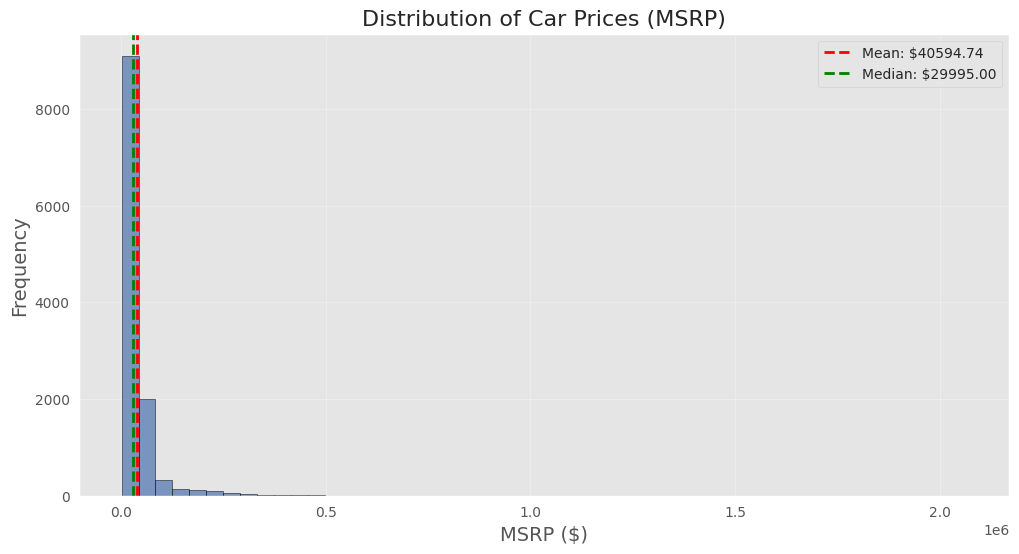

In [41]:
## MSRP Distribution Visualization

# Figure 1: Full MSRP Distribution Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['MSRP'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Prices (MSRP)', fontsize=16)
plt.xlabel('MSRP ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
# Add vertical lines for mean and median
plt.axvline(df['MSRP'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${df["MSRP"].mean():.2f}')
plt.axvline(df['MSRP'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: ${df["MSRP"].median():.2f}')
plt.legend()
plt.show()

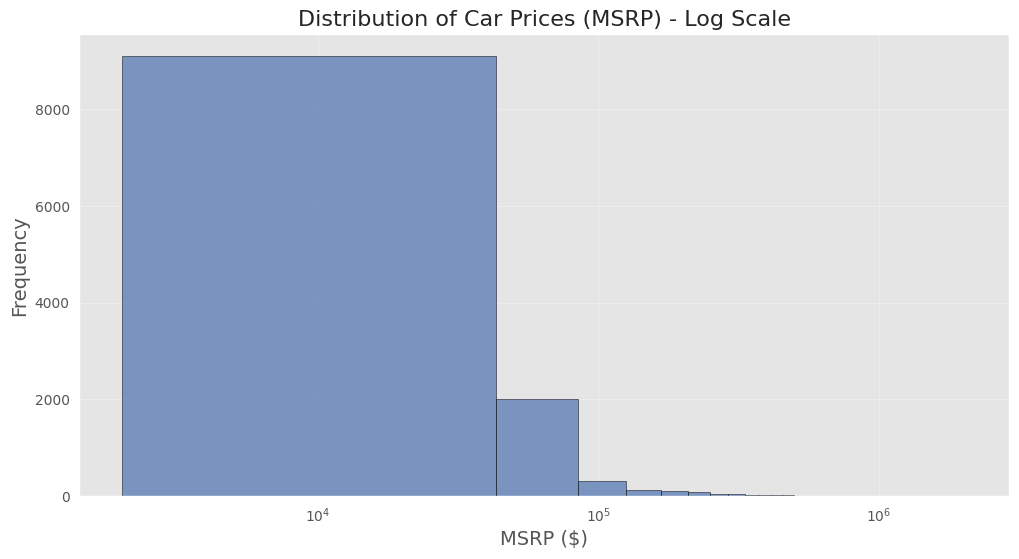

In [42]:
# Figure 2: MSRP Distribution with Log Scale
plt.figure(figsize=(12, 6))
plt.hist(df['MSRP'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Prices (MSRP) - Log Scale', fontsize=16)
plt.xlabel('MSRP ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.show()

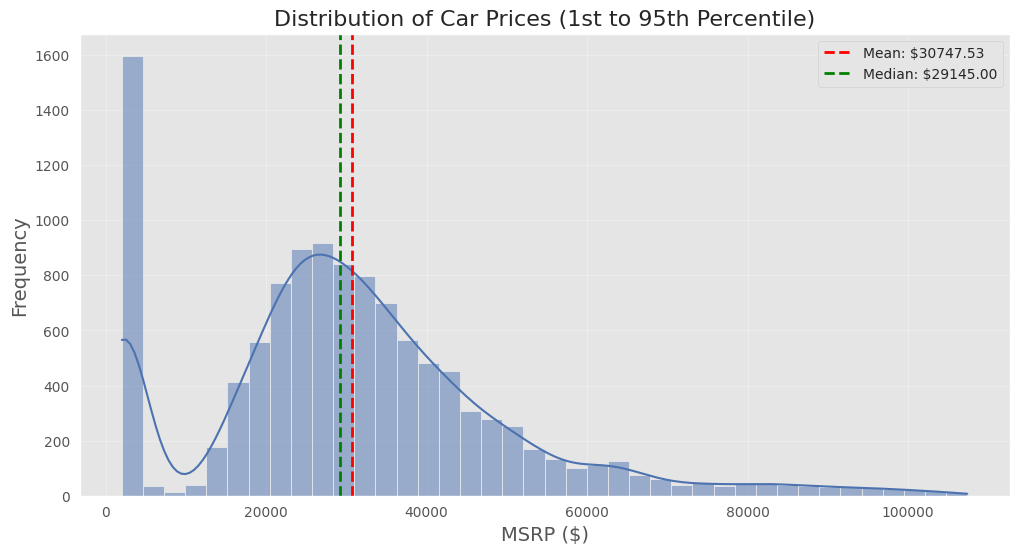

In [44]:
# Figure 3: MSRP Distribution (Focused on common range)
# Filtering out extreme values (focusing on 1st to 95th percentile)
lower_limit = df['MSRP'].quantile(0.01)
upper_limit = df['MSRP'].quantile(0.95)
common_range_df = df[(df['MSRP'] >= lower_limit) & (df['MSRP'] <= upper_limit)]

plt.figure(figsize=(12, 6))
sns.histplot(data=common_range_df, x='MSRP', bins=40, kde=True)
plt.title('Distribution of Car Prices (1st to 95th Percentile)', fontsize=16)
plt.xlabel('MSRP ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
# Add vertical lines for mean and median of this subset
plt.axvline(common_range_df['MSRP'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: ${common_range_df["MSRP"].mean():.2f}')
plt.axvline(common_range_df['MSRP'].median(), color='green', linestyle='dashed', linewidth=2, 
            label=f'Median: ${common_range_df["MSRP"].median():.2f}')
plt.legend()
plt.show()

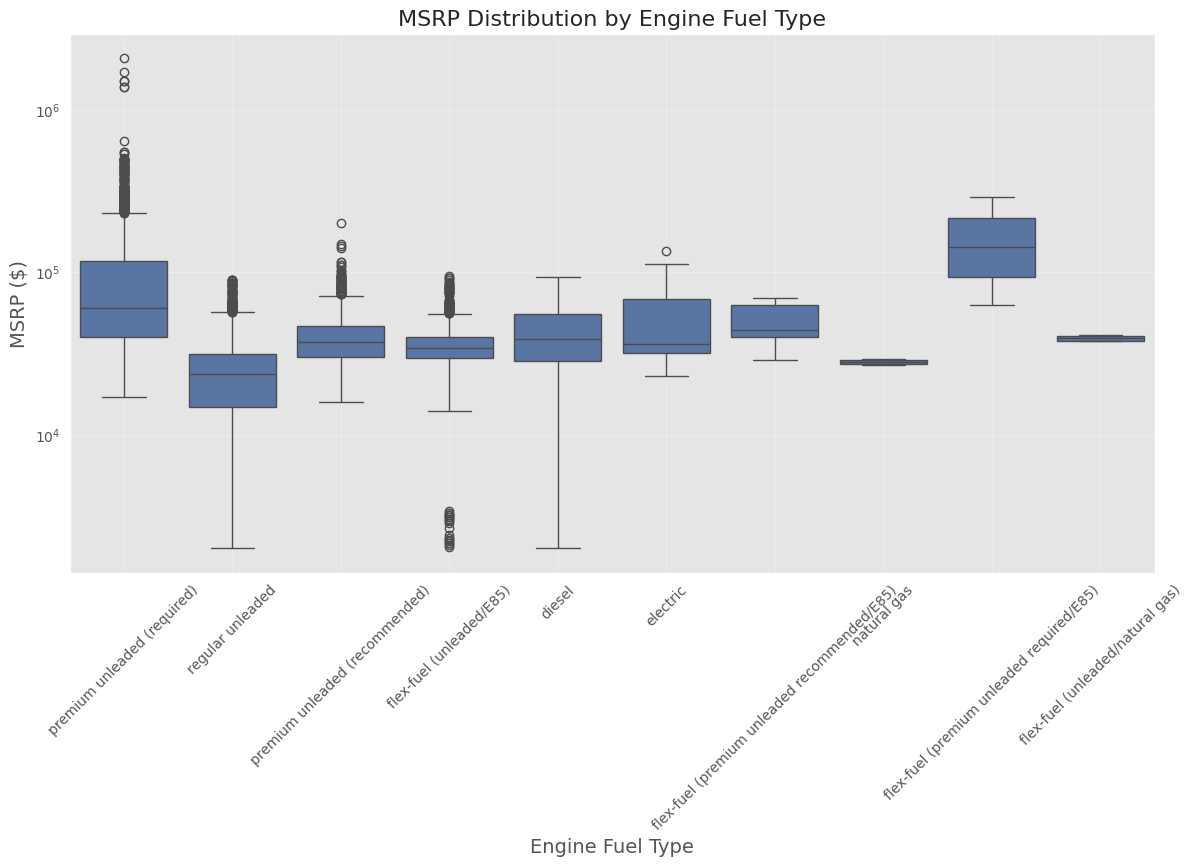

In [45]:
## Price Distribution by Engine Fuel Type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Engine Fuel Type', y='MSRP', data=df)
plt.title('MSRP Distribution by Engine Fuel Type', fontsize=16)
plt.xlabel('Engine Fuel Type', fontsize=14)
plt.ylabel('MSRP ($)', fontsize=14)
plt.yscale('log')  # Using log scale due to wide range
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
## Top 10 Most Expensive Cars
print("\nTop 10 Most Expensive Cars:")
top_expensive = df.sort_values('MSRP', ascending=False).head(10)
top_expensive[['Make', 'Model', 'Year', 'MSRP']]
                                                                                                                                                                                                                                                                                                                                                                                                                                               


Top 10 Most Expensive Cars:


,Make,Model,Year,MSRP
11362,Bugatti,Veyron 16.4,2008,2065902
11364,Bugatti,Veyron 16.4,2009,1705769
8486,Lamborghini,Reventon,2008,1500000
11363,Bugatti,Veyron 16.4,2008,1500000
6351,Maybach,Landaulet,2012,1382750
6350,Maybach,Landaulet,2011,1380000
4024,Ferrari,Enzo,2003,643330
1626,Lamborghini,Aventador,2015,548800
1622,Lamborghini,Aventador,2014,548800
1629,Lamborghini,Aventador,2016,535500
